## Create Graphs
- Create a graph from a list of edges
- create a graph using Adjacency Matrix

![](misc\adj_mat.png)

In [83]:
from pprint import pprint
from typing import List, Dict


#graph_2_vertices = set(list(range(6)))
Graph = {
    0 : [1, 3],
    1 : [4],
    2 : [4,5],
    3 : [1],
    4 : [3],
    5 : [5]
}   


def AdjListToAdjMat(graph: Dict[int, List[int]]) -> List[List[int]]: # type: ignore
    MatSize = len(graph)
    AdjanceyMatrix = [[0 for x in range(MatSize)] for y in range(MatSize)]

    for key , val in Graph.items():
        for i in val:
            AdjanceyMatrix[key][i] = 1

    # for i in range(MatSize):
    #     for j in range(MatSize):
    #         if j in graph_2_edges[i]:
    #             AdjanceyMatrix[i][j] = 1
    return AdjanceyMatrix

def AdjMatToAdjList(Mat: List[List[int]]) -> Dict[int, List[int]]: # type: ignore
    AdjList ={}
    for i in range(len(Mat)):
        for j in range(len(Mat)):
            if Mat[i][j] == 1:
                #adj_list[i] = adj_list.get(i,[]) + [j]
                AdjList[i] = AdjList[i] + [j] if i in AdjList else [j] 
    return AdjList

AdjanceyMatrix = AdjListToAdjMat(Graph)
pprint(AdjanceyMatrix)

adj_list = AdjMatToAdjList(AdjanceyMatrix)
pprint(adj_list)

            

[[0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 1],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1]]
{0: [1, 3], 1: [4], 2: [4, 5], 3: [1], 4: [3], 5: [5]}


## Breadth First Search
- BFS is a graph traversal algorithm that explores nodes in a graph layer by layer.
- It starts at a source node and explores the immediate neighbor nodes first, before moving to the next level neighbors.
- BFS uses a queue data structure to track which node to visit next.
- BFS is guaranteed to find the shortest path between the starting node and all the reachable nodes.

### Implement BFS 
- for graph dictionary of lists  -- `adjacency list`
- for graph list of list -- `adjacency matrix`

In [84]:
graph = {
    0 : [1, 3],
    1 : [4],
    2 : [4,5],
    3 : [1],
    4 : [3],
    5 : [5]
}  
# * bfs_at 0 = 0 > 1 > 3 > 4
# * bfs at 1 = 1 > 4 > 3
# * bfs at 2 = 2 > 5 > 5 >3 > 1
# * initialize starting node
def BFSTList(graph : Dict[int, List[int]], starting_node:int = 0) -> List[int]: # type: ignore
    node = starting_node
    Queue = []  # * queue #* can be implemented using deque
    BFS_traversal = []  # * visited -> dfs traversal

    # * append starting node to queue and visited
    Queue.append(node)
    BFS_traversal.append(node)

    # * while the Q is not empty
    while len(Queue) > 0:
        # * set node to the first element in the queue, and pop it(remove it)
        node = Queue.pop(0)  # ->breakpoint
        # print(s)
        # * for each child connected to node
        for child in graph[node]:
            # * if the node/child is not in visited
            #! debug to trace what's happening
            if child not in BFS_traversal:
                # * append it to the queue and visited
                Queue.append(child)
                BFS_traversal.append(child)
    else:
        print(f"Breadth First Search from node [{starting_node}] = ", BFS_traversal)


BFSTList(graph, 0)
BFSTList(graph, 1)
BFSTList(graph, 2)
BFSTList(graph, 3)
BFSTList(graph, 4)
BFSTList(graph, 5)

Breadth First Search from node [0] =  [0, 1, 3, 4]
Breadth First Search from node [1] =  [1, 4, 3]
Breadth First Search from node [2] =  [2, 4, 5, 3, 1]
Breadth First Search from node [3] =  [3, 1, 4]
Breadth First Search from node [4] =  [4, 3, 1]
Breadth First Search from node [5] =  [5]


In [85]:
Mat = AdjListToAdjMat(graph)
#pprint(Mat)

def BFSTMartix(Mat : List[List[int]], starting_arr_index : int= 0):
    node = starting_arr_index 
    Queue = []  # * queue #* can be implemented using deque
    BFS_traversal = []  # * visited -> dfs traversal

    # * append starting node to queue and visited
    Queue.append(node)
    BFS_traversal.append(node)

    while Queue: # bool(empy_list) is false
        node = Queue.pop(0) #* index of the node = array inside the matrix
        
        #* to find the next node to visit in Matrix it will be done by Indexing
        for i in range(len(Mat[node])): # loop through the node array 
            #* check if the any of potential nodes are connected to the current node
            if Mat[node][i] == 1:
                #* if the node is not visited
                if i not in BFS_traversal:
                    Queue.append(i) #* append index of the potential node to the queue
                    BFS_traversal.append(i) #* append the potential node to the visited list
    else:
        print(f"Breadth First Search from node [{node}] = ", BFS_traversal)


BFSTMartix(Mat, 0)
BFSTMartix(Mat, 1)
BFSTMartix(Mat, 2)
BFSTMartix(Mat, 3)
BFSTMartix(Mat, 4)
BFSTMartix(Mat, 5)

Breadth First Search from node [4] =  [0, 1, 3, 4]
Breadth First Search from node [3] =  [1, 4, 3]
Breadth First Search from node [1] =  [2, 4, 5, 3, 1]
Breadth First Search from node [4] =  [3, 1, 4]
Breadth First Search from node [1] =  [4, 3, 1]
Breadth First Search from node [5] =  [5]


## Depth First Search
- DFS is a graph traversal algorithm that explores nodes in a graph as far as possible along each branch before backtracking.
- It starts at a source node and explores as far as possible along each branch before backtracking.
- DFS uses a stack data structure to track which node to visit next.
- DFS does not guarantee to find the shortest path between the starting node and all the reachable nodes.

### Implement DFS
- for graph : dictionary of lists  -- `adjacency list`
- for graph : list of list -- `adjacency matrix`


In [86]:
graph = {
    0 : [1, 3],# 6, 7],
    1 : [4],
    2 : [4,5],
    3 : [1],
    4 : [3],
    5 : [5]
}  

#* dfs at 0 = 0 > 1 > 4 > 3 
#* dfs at 1 = 1 > 4 > 3 > 1
#* dfs at 2 = 2 > 4 > 3 > 1 > 5

def DFSTList(graph : Dict[int, List[int]], starting_node:int = 0) -> List[int]: # type: ignore
    node = starting_node #* starting node 
    DFS_traversal = []  # * visited -> dfs traversal
    def dfs(node):
        #* define Depth
        # if node in DFS_traversal: #* check if node was visited
        #     pass 
        # else: 
        if node not in DFS_traversal:
            # print(node)
            #* append un visited node
            DFS_traversal.append(node)
            #* loop though neighboors/child
            for neighboor in graph[node]:
                try :
                    #* Rucurrse Depth search for first unvisited neighbor
                    dfs(neighboor) 
                except:
                    pass
                    #* if node doesn't have neighoors
                    #print(f"{neighboor} has no childs") 
    dfs(node)
    #* call dfs for the node 
    print(DFS_traversal)

DFSTList(graph, 0)
DFSTList(graph, 1)
DFSTList(graph, 2)
DFSTList(graph, 3)
DFSTList(graph, 4)
DFSTList(graph, 5)

[0, 1, 4, 3]
[1, 4, 3]
[2, 4, 3, 1, 5]
[3, 1, 4]
[4, 3, 1]
[5]


In [87]:
node = 0
DFST = []

def dfs(node):
    if node in DFST:
        return
    else:
        DFST.append(node)
        for neighboor in Graph[node]:
            dfs(neighboor)
dfs(node)
print(DFST)
topo_sort = DFST[::-1]
topo_sort

[0, 1, 4, 3]


[3, 4, 1, 0]

In [88]:
Mat = AdjListToAdjMat(graph)
#pprint(Mat)
Mat[0]

[0, 1, 0, 1, 0, 0]

In [89]:
Mat = AdjListToAdjMat(graph)


# pprint(Mat)
def DFSTMartix(Mat: List[List[int]], starting_arr_index: int = 0):
    node = starting_arr_index
    DFS_traversal = []

    def dfs(node):
        if node in DFS_traversal:
            return  # * don't use pass o
        else:
            # print(node)
            DFS_traversal.append(node)
            for idx, val in enumerate(Mat[node]):
                if val == 1:
                    try:
                        dfs(idx)
                    except:
                        return
        dfs(node)

    dfs(node)
    print(DFS_traversal)


# DFSTList(graph, 2)
DFSTMartix(Mat, 0)
DFSTMartix(Mat, 1)
DFSTMartix(Mat, 2)
DFSTMartix(Mat, 3)
DFSTMartix(Mat, 4)
DFSTMartix(Mat, 5)

[0, 1, 4, 3]
[1, 4, 3]
[2, 4, 3, 1, 5]
[3, 1, 4]
[4, 3, 1]
[5]


## Topological sorting
[source](https://www.geeksforgeeks.org/topological-sorting/)
- Topological sorting is a linear ordering of vertices such that for every directed edge uv, vertex u comes before v in the ordering.
- Topological sorting for a graph is not possible if the graph is not a DAG.
- Topological Sorting vs Depth First Traversal (DFS):
  - In DFS, we print a vertex and then recursively call DFS for its adjacent vertices. In topological sorting, we need to print a vertex before its adjacent vertices.
  

True
True
[1, 2, 3, 5, 7, 8, 4, 6]
[1, 2, 3, 4, 5, 6, 7, 8]
Breadth First Search from node [1] =  [1, 2, 3, 4, 5, 6, 7, 8]


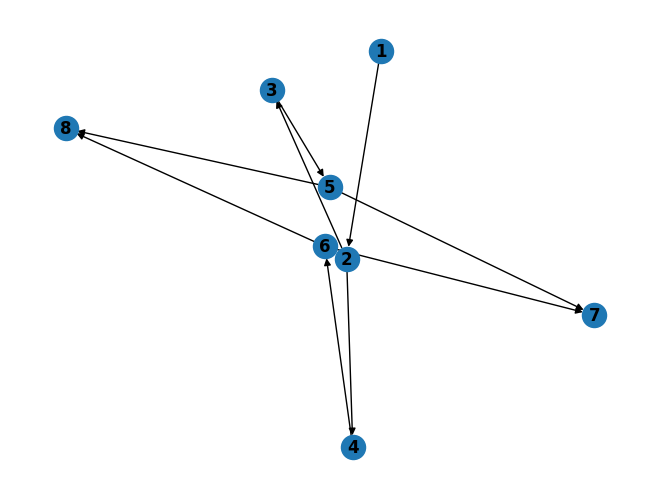

In [153]:

import networkx as nx #pip ins  tall networkx
dag = nx.DiGraph()

graph = {
    1 : [2],
    2 : [3, 4],
    3 : [5],
    4 : [6],
    5 : [7, 8],
    6 : [7, 8],
    7 : [],
    8 : []
}
mylist = []
for key, val in graph.items():
    for i in val:
        mylist.append((key,i))
mylist
dag.add_edges_from(mylist)
nx.draw(dag, with_labels=True, font_weight='bold')
print(nx.is_directed(dag)) # => True

#* check if it's directed acyclic graph
print(nx.is_directed_acyclic_graph(dag)) # => True

DFSTList(graph, 1)
print(list(nx.topological_sort(dag)))
BFSTList(graph, 1)


True
True


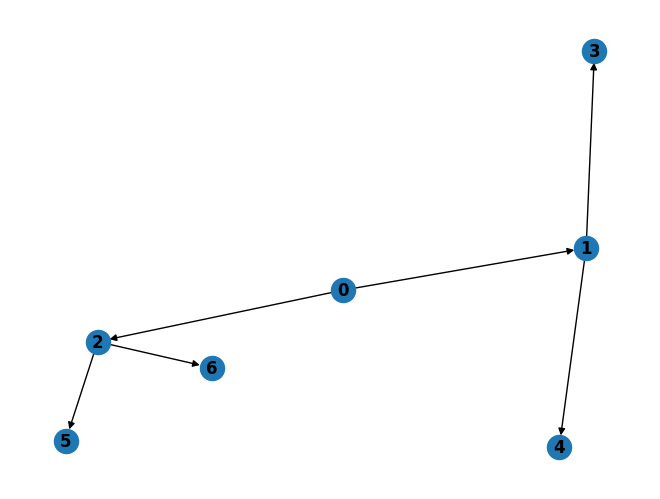

In [105]:
import networkx as nx #pip ins  tall networkx

dag = nx.DiGraph()
dag.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)])

#* draw the graph
nx.draw(dag, with_labels=True, font_weight='bold')


#* check if it's directed graph
print(nx.is_directed(dag)) # => True

#* check if it's directed acyclic graph
print(nx.is_directed_acyclic_graph(dag)) # => True



In [92]:
 #* topological sort our reference
dfs_nx = list(nx.depth_first_search.dfs_edges(dag, source=0))
dfs_nx_simple = [i[1] for i in dfs_nx]
print("Topological sort using Networkx = ", dfs_nx_simple)

#* topological sort using dfs
# DFSTList(dag, 0) #* test this 

#* try to perform DFS on the previous graph

Da_graph = {
    0 : [1, 2],
    1 : [3, 4],
    2 : [5, 6],
}
#* topological sort using dfs
DFSTList(Da_graph, 0)


Topological sort using Networkx =  [1, 3, 4, 2, 5, 6]
[0, 1, 3, 4, 2, 5, 6]


In [186]:
graph = {
    0 : [1, 2],
    1 : [3, 4],
    2 : [5, 6],
    3 : [],
    4 : [],
    5 : [],
    6 : []
}

mylist = []
for key, val in graph.items():
    for i in val:
        mylist.append((key,i))
mylist
dag = nx.DiGraph()
dag.add_edges_from(mylist)

print("DFS", end=":")
DFSTList(graph, 0)
print("nx toposort", list(nx.topological_sort(dag)))
BFSTList(graph, 0)


DFS:[0, 1, 3, 4, 2, 5, 6]
nx toposort [0, 1, 2, 3, 4, 5, 6]
Breadth First Search from node [0] =  [0, 1, 2, 3, 4, 5, 6]


7

In [194]:
def toposort(graph):
    res = []
    visited = []
    def visit(node):
        if node not in visited:
            visited.append(node)
            for neighboor in graph[node]:
                visit(neighboor)
        res.append(node)
    for key, _ in graph.items():
        starting_node = key
        break

    visit(starting_node)
    return res, visited
    
print(toposort(graph))
DFSTList(graph, 0)
BFSTList(graph, 0)

([3, 4, 1, 5, 6, 2, 0], [0, 1, 3, 4, 2, 5, 6])
[0, 1, 3, 4, 2, 5, 6]
Breadth First Search from node [0] =  [0, 1, 2, 3, 4, 5, 6]


## Topologial geekforgeeks


In [127]:
graph = {
    1 : [2],
    2 : [3, 4],
    3 : [5],
    4 : [6],
    5 : [7, 8],
    6 : [7, 8],
    7 : [],
    8 : []
}

visited = {key : False  for key in graph.keys()}
sorted_topo = []
def toposort(node):
    visited[node] = True
    sorted_topo.append(node)
    for child in graph[node]:
        if not visited[child]:
            toposort(child)
  
toposort(1)
print(sorted_topo)

[1, 2, 3, 5, 7, 8, 4, 6]


Geeksforgeeks Topological Sort:[5, 4, 2, 3, 1, 0]
DFS:[5, 2, 3, 1, 0]
Breadth First Search from node [5] =  [5, 2, 0, 3, 1]
nx topological sort [5, 4, 2, 0, 3, 1]
DFS using NX =  [5, [2, 3, 1, 0]]


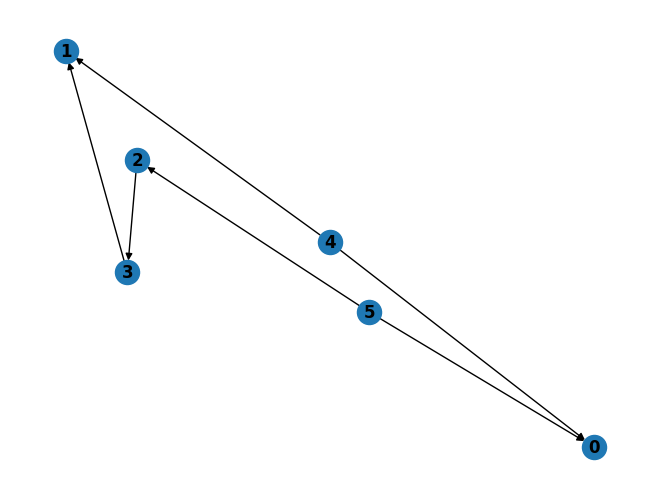

In [152]:
#Python program to print topological sorting of a DAG
from collections import defaultdict
 
#Class to represent a graph
class Graph:
    def __init__(self,vertices):
        self.graph = defaultdict(list) #dictionary containing adjacency List
        self.V = vertices #No. of vertices
 
    # function to add an edge to graph
    def addEdge(self,u,v):
        self.graph[u].append(v)
 
    # A recursive function used by topologicalSort
    def topologicalSortUtil(self,v,visited,stack):
 
        # Mark the current node as visited.
        visited[v] = True
 
        # Recur for all the vertices adjacent to this vertex
        for i in self.graph[v]:
            if visited[i] == False:
                self.topologicalSortUtil(i,visited,stack)
 
        # Push current vertex to stack which stores result
        stack.insert(0,v)
 
    # The function to do Topological Sort. It uses recursive
    # topologicalSortUtil()
    def topologicalSort(self):
        # Mark all the vertices as not visited
        visited = [False]*self.V
        stack =[]
 
        # Call the recursive helper function to store Topological
        # Sort starting from all vertices one by one
        for i in range(self.V):
            if visited[i] == False:
                self.topologicalSortUtil(i,visited,stack)
 
        # Print contents of stack
        print (stack)
 
g= Graph(6)
g.addEdge(5, 2);
g.addEdge(5, 0);
g.addEdge(4, 0);
g.addEdge(4, 1);
g.addEdge(2, 3);
g.addEdge(3, 1);

graph_g ={
    5 : [2, 0],
    4 : [0, 1],
    2 : [3],
    3 : [1],
    0 : [],
    1 : []
}
print ("Geeksforgeeks Topological Sort", end=":")
g.topologicalSort()
print("DFS", end=":")
DFSTList(graph_g, 5)
BFSTList(graph_g, 5)

dag = nx.DiGraph()
mylist = []
for key, val in graph_g.items():
    for i in val:
        mylist.append((key,i))
dag.add_edges_from(mylist)
nx.draw(dag, with_labels=True, font_weight='bold')
print("nx topological sort", list(nx.topological_sort(dag)))
#####################################
source= 5
dfs_nx = list(nx.depth_first_search.dfs_edges(dag, source=source))
dfs_nx_simple = []
dfs_nx_simple.append(source)
dfs_nx_simple.append(list(i[1] for i in dfs_nx))
print("DFS using NX = ", dfs_nx_simple)

## Topological sorting & BackPropagation
- Topological sorting is used in a type of neural network called a feed-forward neural network.
- for the backpropagation we reverse the topological sorting order and use it to update the weights of the neural network.


In [93]:
def NN_TopoSort(graph, starting_node):
    node = starting_node 
    DFS_traversal = []  
    def dfs(node):
        if node in DFS_traversal:
            return
        else: 
            DFS_traversal.append(node)
            for neigboor in graph[node]:
                try :
                    dfs(neigboor)
                except:
                    pass
    dfs(node)
    #* rearrange the list to be from the last node to the first node
    #topo_sort = DFS_traversal[::-1]
    DFS_traversal.reverse()
    topo_sort = DFS_traversal
        
    return topo_sort

back_propagated_graph = NN_TopoSort(Da_graph, 0)
back_propagated_graph #* starting from the last node to the first node

[6, 5, 2, 4, 3, 1, 0]

## Code from Lecture 

In [94]:
graph_1_vertices = set(list(range(8)))
graph_1_edges = {
    0 : [1, 4],
    1 : [0, 5],
    2 : [5, 6],
    3 : [7],
    4 : [0],
    5 : [1, 2, 6],
    6 : [2, 5, 7],
    7 : [3, 6]
}

graph_2_vertices = set(list(range(6)))
graph_2_edges = {
    0 : [1, 3],
    1 : [4],
    2 : [4,5],
    3 : [1],
    4 : [3],
    5 : [5]
}   



In [95]:
from graphviz import Digraph, Graph
def draw_graph(vertices, edges, directed ):
    
    #* type of graph
    if directed:
        dot = Digraph(format='svg')
    else :
        dot = Graph(format='svg')
        
    #* add vertices
    for v in vertices:
        dot.node(name = str(v), label = str(v))
    
    if not directed:
        alread_drawn = set()
    for k, v in edges.items():
        for curr_v in v:
            if directed:
                dot.edge(str(k), str(curr_v))
            else:
                sorted_edge = tuple(sorted([k, curr_v]))
                if sorted_edge not in alread_drawn:
                    alread_drawn.add(sorted_edge)
                    dot.edge(str(k), str(curr_v))
            
    return dot




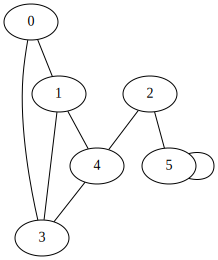

In [96]:
draw_graph(graph_2_vertices, graph_2_edges, directed = False)

## Breadth FIrst Search
- [animation](https://www.youtube.com/watch?v=mVzsz8Actrc&ab_channel=JazonJiao)

2
5
6
1
7
0
3
4


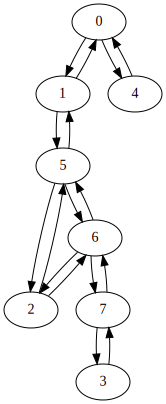

In [97]:
from collections import deque

#* BFS
#* Source vertex is 2
s = 2

#* creating a q
q = deque()
visited = set()

#* init
q.append(s)
visited.add(s)

while len(q)>0:
    #* pop
    curr_v = q.popleft()
    
    #* check node 
    print(curr_v)
    
    for neighbor in graph_1_edges[curr_v]:
        if neighbor not in visited:
            q.append(neighbor)
            visited.add(neighbor)
draw_graph(graph_1_vertices, graph_1_edges, directed = True)

## Depth First Search
- [animation](https://www.youtube.com/watch?v=mE_PCK0oFyo&ab_channel=NathanielFan)

visted 2 before 
visted 4 before 
visted 3 before 
visted 1 before 
visted 5 before 


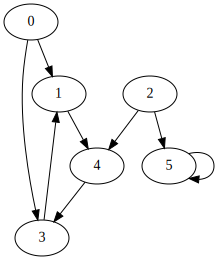

In [98]:
#* DFS
graph_vertices = graph_2_vertices
grap_edges = graph_2_edges

s =2 
visited = set()

def dfs (v):
    if v in visited:
        return 
    else :
        visited.add(v)
        print(f'visted {v} before ')
        for neighbor in graph_2_edges[v]:
            dfs(neighbor)
        
            
dfs(s)
draw_graph(graph_2_vertices, graph_2_edges, directed = True)


## Visiting all nodes


In [99]:
graph_vertices = graph_2_vertices
grap_edges = graph_2_edges

s =2 
visited = set()

def dfs (v):
    if v in visited:
        return 
    else :
        visited.add(v)
        print(f'visted {v} before ')
        for neighbor in grap_edges[v]:
            dfs(neighbor)

for node in graph_vertices:
    if not node in visited:
        #print(f'node {node}')
        print(f'dfs from node {node}')
        dfs(node)
        print()

        

dfs from node 0
visted 0 before 
visted 1 before 
visted 4 before 
visted 3 before 

dfs from node 2
visted 2 before 
visted 5 before 



RMSE = Root Mean Squared Error
$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

In [100]:
import torch
RMSE  = lambda y, y_hat : torch.sqrt(torch.mean((y - y_hat)**2))

Mean of Euclidean distances
$$ D_\mu(x, y) = \frac{1}{n} \sum_{i=1}^{n} \sqrt{(x_\mu - x_i)^2 + (y_\mu - y_i)^2} $$

In [101]:
xmu , ymu = 0.5, 0.5
L = lambda x, y : torch.mean(torch.sqrt(torch.sum((xmu - x)**2 + (ymu - y)**2), dim = 1))